# Extreme Fill 2D Example

In [1]:
from collections import namedtuple
from toolz.curried import map, pipe, compose, get, do, curry, count, pluck, juxt, flip
from extremefill2D.systems import ExtremeFillSystem
from extremefill2D.tools import WriteCupricData
import shutil
from extremefill2D.contourViewer import ContourViewer
import numpy as np
import json
import os

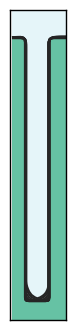

In [8]:
def fcompose(*args):
    return compose(*args[::-1])

def make_object(dict_):
    return namedtuple("ParamClass", dict_.keys())(*dict_.values())

def run(params):
    return ExtremeFillSystem(
        params,
        WriteCupricData(params.datafile),
    ).run(print_data=False)

def read_params(jsonfile):
    with open(jsonfile, 'r') as filepointer:
        dict_ = json.load(filepointer)
    return dict_

def contour_plot(args):
    datafile, params = args
    viewer = ContourViewer(datafile, indexJump=params.data_frequency, featureDepth=56e-6)
    return viewer.plot(indices=np.arange(0, params.totalSteps, params.data_frequency))

def copy_file(params):
    tmp = 'tmp.h5'
    shutil.copy(params.datafile, 'tmp.h5')
    return (tmp, params)

def main(jsonfile, datafile='data.h5', **extra_params):
    return pipe(
        jsonfile,
        read_params,
        lambda json_params: {'datafile' : datafile,
                             **json_params,
                             **extra_params},
        make_object,
        do(lambda x: os.remove(x.datafile) if os.path.exists(x.datafile) else None),
        do(run),
        copy_file,
        contour_plot)

_ = main('scripts/params.json', totalSteps=300, data_frequency=30)
